In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [53]:
# x = np.random.RandomState(seed = 1).rand(120)
# y = np.random.RandomState(seed = 2).rand(120)
# labels = np.random.RandomState(seed = 3).permutation(np.arange(3))
# labels = np.repeat(labels, 40)

In [54]:
# sns.scatterplot(x=x, y=y, hue=labels)

In [55]:
x = [0, 1, 2, 4, 6, 3, 10, 8, 5, 12]
y = [2, 5, 9, 1, 6, 16, 24, 16, 25, 20]
labels = [0,0,0,0,0,1,2,2,1,2,]
data = np.array([x, y, labels]).T
data

array([[ 0,  2,  0],
       [ 1,  5,  0],
       [ 2,  9,  0],
       [ 4,  1,  0],
       [ 6,  6,  0],
       [ 3, 16,  1],
       [10, 24,  2],
       [ 8, 16,  2],
       [ 5, 25,  1],
       [12, 20,  2]])

Text(0, 0.5, 'Y')

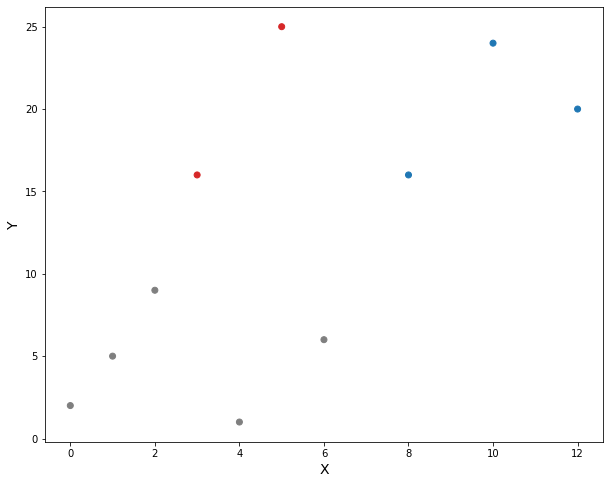

In [56]:
# sns.scatterplot(x=x, y=y, hue = labels)
fig, ax = plt.subplots(figsize = (10, 8))
colors = {'0': 'tab:gray', '1': 'tab:red', '2':'tab:blue'}
ax.scatter(x, y, c=[colors[str(x)] for x in labels])
plt.xlabel('X', fontsize = 14)
plt.ylabel('Y', fontsize = 14)

If we. have a new data point, `(3, 5)`, what color do you think it will have? Most likely gray, right? I guess you must have this mental model:

```
if x > 6 return blue
    else 
        if y > 9 return red
        else return gray
```

This mental model is easy to build when we have only a few data points. Things get complicated if we have millions of data points with dozens of different labels (rather than three in our example). So we need to find a way to automate this procedure. BTW, the mental model above is an example of decision tree, which is the topic of this blog post. 

The first step is find a split on x or y. For simplicity, we only make splits at values present in our data. The problem is, how do we find the split? Which metric should we apply in determining which split is better than another one?

If we have only two classes, i.e., labels, an intuitive metric would be the accuracy, or the error rate. For example, if the red here is also gray, then for any split at x, we simply calcuate the number of points that are different than the majority class in its side. However, right now, we have three classes, and this simple metric does not work. Why? For example, if we split at `x > 6`, it's hard to say how many errors we made on the left side, right? Because we have both the gray and the red class.  

A better option here should be the measure of impurity either through "[entropy](/en/2022/09/21/entropy/)" or "[Gini index](https://victorzhou.com/blog/gini-impurity/)". In this pose, I use entropy. If you do not fully understand what entropy is, make sure to read [my post on it](/en/2022/09/21/entropy/). 

The purpose of splitting is to have purity, i.e., to decrease entropy. Of course, we could compare the entropies to decide which split is better but a more conventional approach is to compare "information gain", which is in fact the same as compare entropies. 

What is information gain? 

First, we have an entropy for the data before any split, right? Let's first calculate that:

In [57]:
p_red = 2/10
p_blue = 3/10
p_gray = 5/10
initial_entropy = -p_red*np.log2(p_red) - p_blue*np.log2(p_blue) - p_gray*np.log2(p_gray)

# this is the initial entropy
round(initial_entropy, 2)

1.49

Now, let's compare two splits: `x = 2` and `x = 8`. 